#### Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

#### Chargement du dataset

In [2]:
data = pd.read_csv("colon1.csv", sep=';');
data.head(5)


,id_sample,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal


In [3]:
data = data.drop(columns=['id_sample'])

In [4]:
data.head(5)

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal


#### Gestion des valeurs manquantes

In [5]:
print(data.isnull().sum()) 

ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
CTSS             0
                ..
GAL              0
CRYL1            0
YBX2             0
ANGPTL4          0
tissue_status    0
Length: 61, dtype: int64


In [67]:
print(data.dtypes)

ADH1C            float64
DHRS11           float64
UGP2             float64
SLC7A5           float64
CTSS             float64
                  ...   
GAL              float64
CRYL1            float64
YBX2             float64
ANGPTL4          float64
tissue_status     object
Length: 61, dtype: object


#### vérifiez si le dataset est équilibré. 

In [6]:
print(data['tissue_status'].value_counts())

tissue_status
normal     402
tumoral    402
Name: count, dtype: int64


In [56]:
data.describe()

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,SYTL2,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,5.588943,4.354817,5.557694,4.513570,6.717535,7.218184,2.737937,2.806573,3.064394,3.658318,...,3.599294,4.682718,4.225014,4.575397,4.097244,1.823268,2.822931,6.096634,2.801603,2.596452
std,2.889901,1.431179,1.150565,1.614450,1.077821,1.411969,1.466906,1.243826,1.191486,1.258059,...,1.054504,0.917027,1.656088,0.859138,1.276589,0.721587,1.338349,0.840122,1.011971,1.000962
min,0.610504,1.427079,2.027201,1.685024,3.668691,1.164886,0.716737,0.368200,0.610504,0.858074,...,1.286220,1.868389,0.637047,2.250347,1.015235,0.118945,0.610504,2.031471,0.000000,0.757246
25%,3.174250,3.118844,4.611060,3.030022,6.065937,6.241714,1.550382,1.864561,2.198244,2.655091,...,2.878356,4.349295,2.921069,3.958903,3.131267,1.337715,1.840902,5.489589,2.277491,1.824823
50%,5.467024,4.125990,5.412204,4.382953,6.762908,7.578782,2.297732,2.741509,2.900393,3.605686,...,3.613342,4.869313,4.116251,4.537381,3.975276,1.689671,2.591044,6.150297,2.905605,2.442378
75%,8.444756,5.696566,6.556969,5.918848,7.485487,8.263561,3.669509,3.574304,3.752899,4.686086,...,4.417632,5.249372,5.507864,5.070072,5.118110,2.211967,3.661012,6.728052,3.505721,3.139738
max,10.263846,7.022241,7.571114,8.059430,8.990703,10.079135,6.682541,6.591924,6.276628,6.350919,...,5.713776,7.029946,9.045672,7.647284,7.129499,4.763212,7.545757,8.723941,5.169059,6.493643


#### Visualisation de la distribution des gènes sous forme d'histogrammes

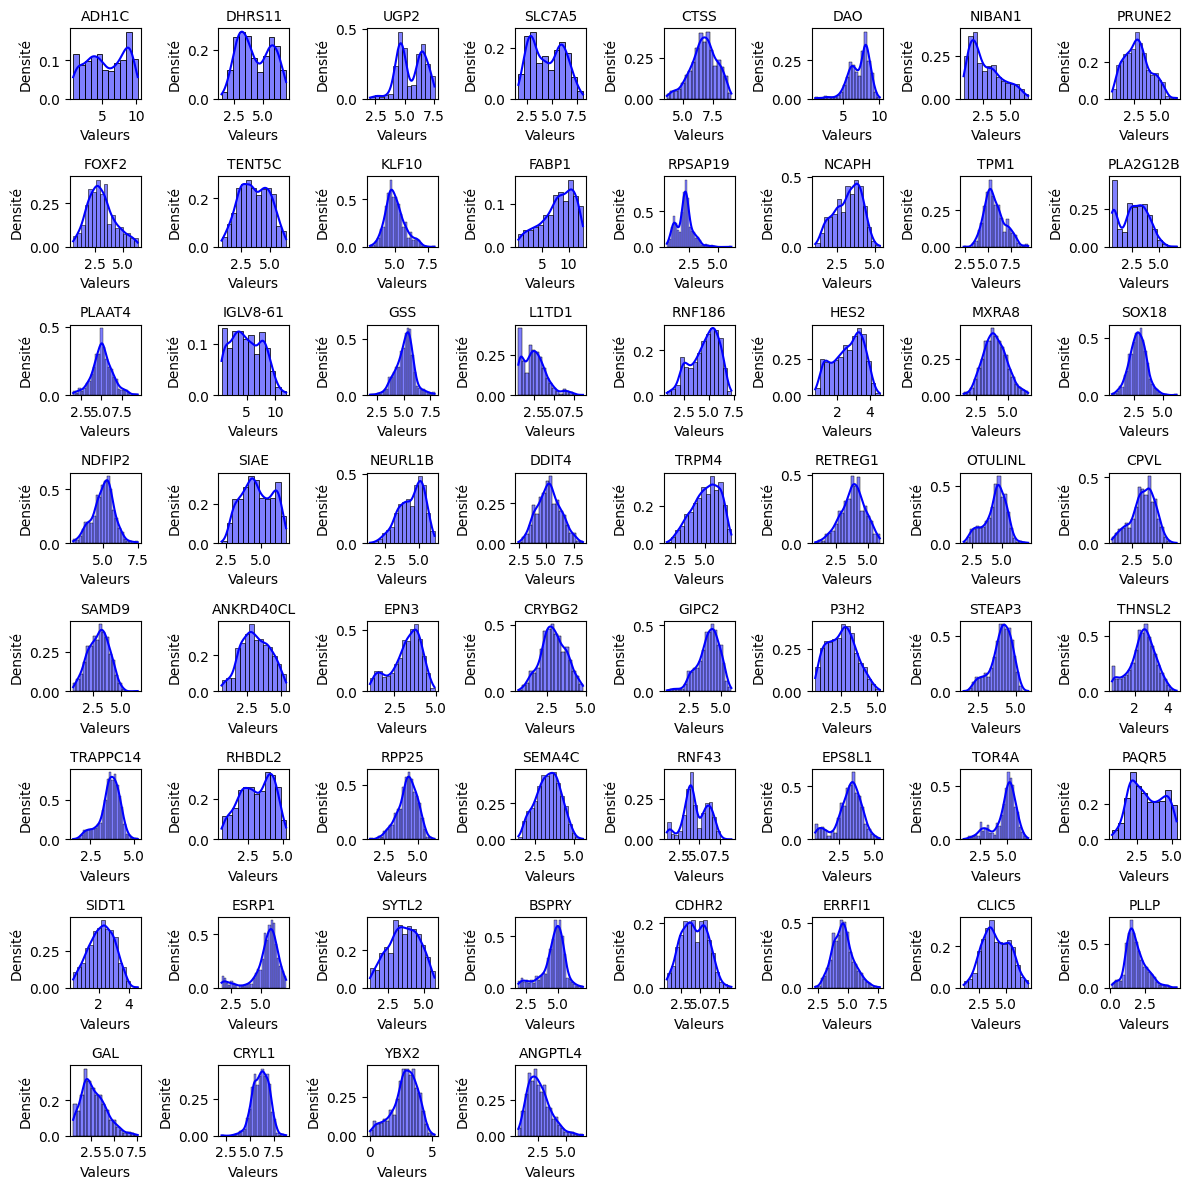

In [7]:

 X = data.drop(columns=['tissue_status', 'id_sample'])  # Supprime les colonnes non numériques
 y = data['tissue_status'].values  # Cible

# Nombre de gènes (features)
n_features = X.shape[1]  

# Déterminer la disposition de la grille (proche d'un carré)
n_rows = int(np.ceil(np.sqrt(n_features)))  # Nombre de lignes
n_cols = int(np.ceil(n_features / n_rows))  # Nombre de colonnes

# Créer la figure avec des subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))  # Ajuster la taille globale
axes = axes.flatten()  # Aplatir pour un accès plus facile

# Tracer un histogramme pour chaque colonne de 'data'
for i, column in enumerate(X.columns):
    sns.histplot(X[column], kde=True, color='blue', stat='density', ax=axes[i])
    axes[i].set_title(f'{column}', fontsize=10)  # Utilisation du vrai nom du gène
    axes[i].set_xlabel('Valeurs')
    axes[i].set_ylabel('Densité')

# Cacher les axes inutilisés (si le nombre de gènes n'est pas un carré parfait)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'affichage
plt.tight_layout()
plt.show()


#### Encodage, séparation et standardisation des données pour la classification

In [10]:


# 1. Encodage de la variable cible 'tissue_status'
y = data['tissue_status'].map({'normal': 0, 'tumoral': 1})

X = data.drop(columns=['tissue_status'])  # Enlever la colonne cible des features

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Standardisation des variables indépendantes
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns) # fit + transform sur train
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns) # seulement transform sur test

# Cela permet d’éviter la fuite de données (data leakage), c’est-à-dire l’utilisation
# d’informations du test pendant l’entraînement, ce qui fausserait l’évaluation du modèle.


## application de la regression logistique

on définir la fonction sigmoïde, qui est utilisée dans la régression logistique pour transformer la sortie linéaire en une probabilité comprise entre 0 et 1. Ensuite, la fonction entrainer_regression_logistique implémente l'entraînement du modèle par descente de gradient stochastique. Cette fonction prend en entrée les variables explicatives X et la variable cible y. Les données sont converties en tableaux NumPy, puis une colonne de biais (constante égale à 1) est ajoutée à X. Un vecteur de coefficients beta initialisé à zéro est ensuite mis à jour au fil des itérations. Pour chaque observation, la prédiction est calculée avec la fonction sigmoïde, et l'erreur est utilisée pour ajuster les coefficients beta en fonction du taux d'apprentissage. Une fois le modèle entraîné, les prédictions sont faites avec la fonction predire_regression_logistique, qui applique la fonction sigmoïde sur le produit matriciel X @ beta, puis applique un seuil de 0.5 pour classer les sorties en 0 ou 1.

Les coefficients appris (beta_appris) sont ensuite utilisés pour prédire les classes sur l’ensemble de test. L’évaluation des performances se fait grâce à l’accuracy (taux de bonnes prédictions) et au rapport de classification, qui affiche la précision, le rappel et le F1-score pour chaque classe. Enfin, une matrice de confusion est affichée sous forme de carte thermique (heatmap) avec Seaborn, afin de visualiser le nombre de bonnes et mauvaises classifications entre les deux classes (Classe 0 et Classe 1).

🔹 Accuracy : 1.0000

🔹 Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



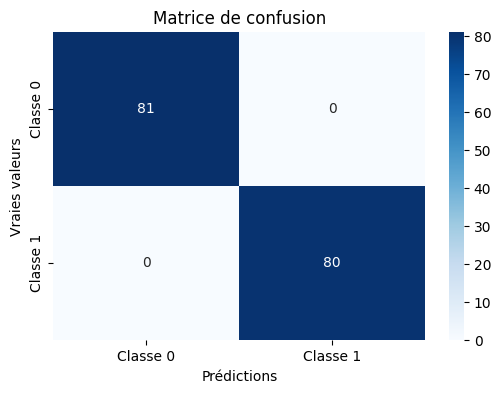

In [9]:
# Fonction sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fonction d'entraînement de la régression logistique (descente de gradient)
def entrainer_regression_logistique(X, y, taux_apprentissage=0.01, nombre_iterations=1000):
    X = np.array(X)
    y = np.array(y)  # Convertir y en tableau NumPy

    m, n = X.shape        # m = nb d'observations, n = nb de variables (colonnes)
    X = np.c_[np.ones((m, 1)), X]  # Ajouter la colonne de biais
    beta = np.zeros(n + 1)

    for _ in range(nombre_iterations):
        for i in range(m):
            z = np.dot(beta, X[i])
            y_pred = sigmoid(z)
            erreur = y_pred - y[i]  # Maintenant y[i] fonctionne
            beta -= taux_apprentissage * erreur * X[i]
    
    return beta


# Fonction de prédiction
def predire_regression_logistique(X, beta):
    m = X.shape[0]
    X = np.c_[np.ones((m, 1)), X]  # Ajouter la colonne de biais
    z = np.dot(X, beta)
    y_pred = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Entraînement
beta_appris = entrainer_regression_logistique(X_train, y_train, taux_apprentissage=0.1, nombre_iterations=1000)

# Prédictions
y_pred = predire_regression_logistique(X_test, beta_appris)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'🔹 Accuracy : {accuracy:.4f}')
print("\n🔹 Rapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()


Les données génomiques contiennent souvent plusieurs de variables (gènes) pour un nombre relativement faible d'échantillons. Cela crée un problème de malédiction de la dimensionnalité, qui peut conduire à un surapprentissage (overfitting).

La régression logistique est sensible aux variables inutiles : elle peut être instable ou peu performante si trop de variables non informatives sont incluses.

Réduire le bruit en sélectionnant les gènes les plus discriminants améliore les performances des modèles, notamment en généralisation sur de nouvelles données.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform
import numpy as np

# 2. Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des données
    ('model', LogisticRegression(max_iter=1000))  # Modèle de base
])

# 3. Définition des hyperparamètres à tester
param_dist = {
    'model__C': loguniform(1e-3, 100),  # Force de régularisation
    'model__penalty': ['l2', 'l1'],     # Type de régularisation
    'model__solver': ['liblinear', 'saga'],  # Solvers compatibles
    'model__class_weight': [None, 'balanced']  # Gestion des classes déséquilibrées
}

# 4. Recherche aléatoire
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,               # Nombre d'itérations
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',       # Métrique d'évaluation
    random_state=42,         # Reproductibilité
    n_jobs=-1                # Utilisation de tous les CPU
)

# 5. Exécution de l'optimisation
random_search.fit(X_train, y_train)

# 6. Résultats
print("Meilleurs hyperparamètres:", random_search.best_params_)
print("Meilleur score (accuracy):", random_search.best_score_)

# 7. Évaluation sur le jeu de test
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

Meilleurs hyperparamètres: {'model__C': 7.915074397656218, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'saga'}
Meilleur score (accuracy): 0.9984496124031008


#### Importance des gènes basée sur les coefficients du modèle

In [29]:
# 1. Accéder au modèle de régression logistique dans le pipeline
logistic_model = best_model.named_steps['model']

# 2. Obtenir les coefficients du modèle en valeur absolue
coefficients = np.abs(logistic_model.coef_[0])  # Valeurs absolues des coefficients

# 3. Associer les coefficients aux noms des gènes
gene_importance = pd.DataFrame({
    'Gene': X_train.columns,  # Noms des gènes
    'Coefficient': coefficients  # Coefficients absolus
})

# 4. Trier par importance décroissante
gene_importance = gene_importance.sort_values('Coefficient', ascending=False)

# Afficher les 10 gènes les plus importants
print(gene_importance.head(10))

         Gene  Coefficient
44      RNF43     1.374619
3      SLC7A5     1.283886
5         DAO     0.996749
2        UGP2     0.980429
26    NEURL1B     0.834394
13      NCAPH     0.827562
27      DDIT4     0.713023
6      NIBAN1     0.674344
8       FOXF2     0.619811
33  ANKRD40CL     0.610349


In [33]:
# Initialisation
accuracies = []
selected_genes = []
correlation_threshold = 0.7  # Modifié à 0.1 comme dans votre étude initiale
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

# Fonction d'évaluation optimisée
def evaluate_model(genes):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[genes])
    X_test_scaled = scaler.transform(X_test[genes])
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    return accuracy_score(y_test, model.predict(X_test_scaled))

# Sélection incrémentale améliorée
for gene in gene_importance_sorted['Gene']:
    # Vérification de corrélation vectorisée (plus rapide)
    if selected_genes:
        corr_matrix = X_train_df[selected_genes + [gene]].corr().values
        max_corr = np.max(np.abs(corr_matrix[:-1, -1]))  # Corr avec les gènes existants
        if max_corr > correlation_threshold:
            continue
    
    # Ajout et évaluation
    selected_genes.append(gene)
    current_acc = evaluate_model(selected_genes)
    accuracies.append(current_acc)
    
    print(f"Ajout du gène {gene} | Accuracy: {current_acc:.4f} | Gènes actifs: {len(selected_genes)}")
    
    # Critère d'arrêt
    if len(accuracies) > 10 and np.std(accuracies[-5:]) < 0.001:  # Stabilité sur 5 itérations
        print("► Convergence atteinte (accuracy stable)")
        break

# Résultats finaux
result_df = pd.DataFrame({
    'Gene': selected_genes,
    'Accuracy': accuracies,
    'Rank': range(1, len(selected_genes)+1)
})

print("\n🔎 Résumé final :")
print(result_df.to_string(index=False))

Ajout du gène RNF43 | Accuracy: 0.8447 | Gènes actifs: 1
Ajout du gène SLC7A5 | Accuracy: 0.9317 | Gènes actifs: 2
Ajout du gène DAO | Accuracy: 0.9876 | Gènes actifs: 3
Ajout du gène NEURL1B | Accuracy: 1.0000 | Gènes actifs: 4
Ajout du gène NCAPH | Accuracy: 1.0000 | Gènes actifs: 5
Ajout du gène DDIT4 | Accuracy: 1.0000 | Gènes actifs: 6
Ajout du gène FOXF2 | Accuracy: 1.0000 | Gènes actifs: 7
Ajout du gène CLIC5 | Accuracy: 1.0000 | Gènes actifs: 8
Ajout du gène NIBAN1 | Accuracy: 1.0000 | Gènes actifs: 9
Ajout du gène DHRS11 | Accuracy: 1.0000 | Gènes actifs: 10
Ajout du gène ANKRD40CL | Accuracy: 1.0000 | Gènes actifs: 11
► Convergence atteinte (accuracy stable)

🔎 Résumé final :
     Gene  Accuracy  Rank
    RNF43  0.844720     1
   SLC7A5  0.931677     2
      DAO  0.987578     3
  NEURL1B  1.000000     4
    NCAPH  1.000000     5
    DDIT4  1.000000     6
    FOXF2  1.000000     7
    CLIC5  1.000000     8
   NIBAN1  1.000000     9
   DHRS11  1.000000    10
ANKRD40CL  1.000000

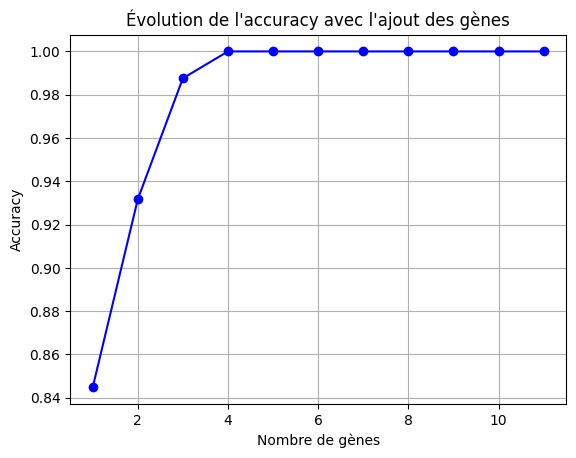

In [34]:

# Tracer la courbe de l'accuracy en fonction du nombre de gènes
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', color='b')
plt.title("Évolution de l'accuracy avec l'ajout des gènes")
plt.xlabel("Nombre de gènes")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


#### En conclusion, après avoir évalué l'accuracy du modèle avec différents sous-ensembles de gènes, j'ai choisi d'utiliser 3 gènes. En effet, à partir de cette sélection, l'accuracy du modèle ne varie plus, indiquant que l'ajout de nouveaux gènes n'apporte plus d'amélioration significative au modèle


🔍 Réentraînement avec les 3 gènes sélectionnés : ['RNF43', 'SLC7A5', 'DAO']

🔹 Accuracy finale avec les 3 gènes : 0.9876

🔹 Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.98      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



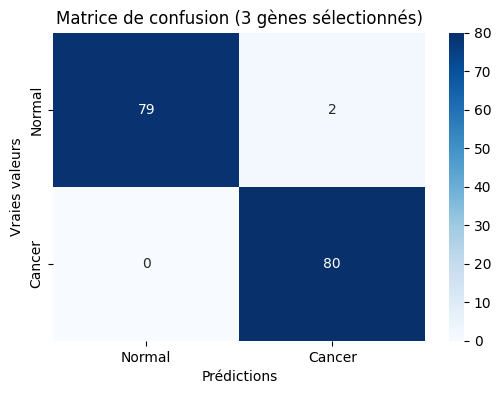

In [35]:
# Prendre uniquement les 3 premiers gènes sélectionnés
top_3_selected_genes = selected_genes[:3]
print("\n🔍 Réentraînement avec les 3 gènes sélectionnés :", top_3_selected_genes)

# Préparer les données
X_train_top3 = X_train[top_3_selected_genes]
X_test_top3 = X_test[top_3_selected_genes]

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top3)
X_test_scaled = scaler.transform(X_test_top3)

# Régression logistique
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'\n🔹 Accuracy finale avec les 3 gènes : {accuracy:.4f}')
print("\n🔹 Rapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion (3 gènes sélectionnés)")
plt.show()


## KNN

In [66]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Valeurs de k et distances à tester
k_values = [3, 10]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
results = []   # Recherche combinée (k + métrique)
for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_scores)
        results.append({'k': k, 'metric': metric, 'accuracy': mean_score})
        print(f"k = {k}, metric = {metric}, précision moyenne = {mean_score:.4f}")

# Meilleur modèle
best_result = max(results, key=lambda x: x['accuracy'])
print(f"\n✅ Meilleure combinaison : k = {best_result['k']}, distance = {best_result['metric']}, "
      f"précision = {best_result['accuracy']:.4f}")

k = 3, metric = euclidean, précision moyenne = 0.9984
k = 10, metric = euclidean, précision moyenne = 0.9969
k = 3, metric = manhattan, précision moyenne = 0.9984
k = 10, metric = manhattan, précision moyenne = 0.9969
k = 3, metric = chebyshev, précision moyenne = 0.9393
k = 10, metric = chebyshev, précision moyenne = 0.9549

✅ Meilleure combinaison : k = 3, distance = euclidean, précision = 0.9984


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 4. Fonctions KNN
def calculer_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def k_plus_proches_voisins(X_train, y_train, x_test, k):
    distances = [(calculer_distance(x_test, x_i), y_i) for x_i, y_i in zip(X_train, y_train)]
    k_voisins = [y for _, y in sorted(distances, key=lambda x: x[0])[:k]]  # Tri par distance
    return Counter(k_voisins).most_common(1)[0][0]

def predire_knn(X_train, y_train, X_test, k):
    return [k_plus_proches_voisins(X_train, y_train, x_test, k) for x_test in X_test]  # itération directe sur les lignes

k = 3
# Conversion en array si ce n’est pas déjà le cas
X_train_array = np.array(X_train_scaled)
X_test_array = np.array(X_test_scaled)
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# Prédiction
predictions = predire_knn(X_train_array, y_train_array, X_test_array, k)

# Rapport
print("\n📊 Rapport de classification :")
print(classification_report(y_test_array, predictions))



📊 Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



Le k-NN (k plus proches voisins) est un modèle basé sur la distance (souvent Euclidienne) et non paramétrique. Il ne construit pas de fonction explicite ou de coefficients que l’on pourrait interpréter comme dans la régression ou les arbres.
- Il ne vous dit donc pas directement "ce gène est important", car il se contente de regarder quels voisins sont proches.
- Solution : utiliser des méthodes externes pour évaluer l’importance des gènes

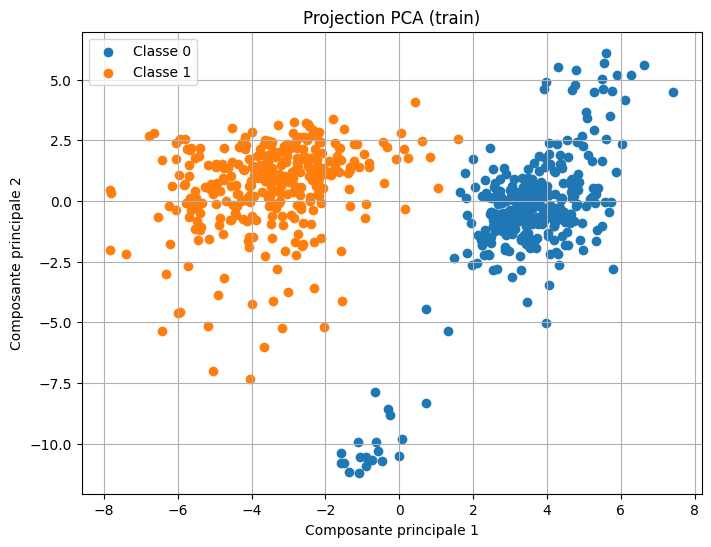

In [39]:
from sklearn.decomposition import PCA

# 1. Appliquer le PCA après la standardisation
pca = PCA(n_components=2)  # Tu peux ajuster à 2 ou plus selon l'exploration
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 2. Visualisation éventuelle (facultatif)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Classe {label}')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection PCA (train)')
plt.legend()
plt.grid(True)
plt.show()



In [74]:
# 3. Réutilisation du KNN sur les données projetées (PCA)
from sklearn.metrics import classification_report

k = 3
accuracies_pca = []

# Prédictions avec k-NN sur les données PCA
predictions_pca = predire_knn(X_train_pca, y_train, X_test_pca, k)
accuracy_pca = accuracy_score(y_test, predictions_pca)
accuracies_pca.append((k, accuracy_pca))

# Affichage des résultats
print(f"[PCA] K = {k}, Accuracy = {accuracy_pca:.2f}")
print("\n📊 Rapport de classification après PCA :")
print(classification_report(y_test, predictions_pca))


[PCA] K = 3, Accuracy = 1.00

📊 Rapport de classification après PCA :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        80

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



#### ANOVA

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Sélection des meilleurs gènes (par exemple, les 10 meilleurs)
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_train_scaled, y_train)

# Indices et scores
selected_indices = selector.get_support(indices=True)
selected_gene_names = data.columns[selected_indices]
scores = selector.scores_[selected_indices]

# Créer un DataFrame pour trier par score décroissant
gene_scores = pd.DataFrame({
    'Gene': selected_gene_names,
    'Score': scores
}).sort_values(by='Score', ascending=False)

# Affichage
print("🔬 Gènes sélectionnés par ordre d’importance :")
print(gene_scores.to_string(index=False))


🔬 Gènes sélectionnés par ordre d’importance :
   Gene       Score
   UGP2 2104.058920
 SLC7A5 1617.316716
NEURL1B  943.662791
    DAO  923.884997
  ADH1C  863.871553
  RNF43  814.340970
  CLIC5  649.190956
  FOXF2  563.916850
 DHRS11  547.354632
 TENT5C  494.340531


In [86]:
from sklearn.metrics import accuracy_score
import numpy as np


selected_genes = []
accuracies = []
last_accuracy = 0

# Boucle sur les gènes triés par importance
for i, gene in enumerate(gene_scores['Gene']):
    # Vérifie si ce gène est trop corrélé à un déjà sélectionné
    correlated = any(
        abs(np.corrcoef(X_train_scaled.iloc[:, data.columns.get_loc(gene)],
                        X_train_scaled.iloc[:, data.columns.get_loc(sel_gene)])[0, 1]) > 0.7
        for sel_gene in selected_genes
    )
    if correlated:
        continue

    # Ajouter le gène
    selected_genes.append(gene)

    # Sélection des colonnes correspondantes
    indices = [data.columns.get_loc(g) for g in selected_genes]
    X_train_sub = X_train_scaled.iloc[:, indices]
    X_test_sub = X_test_scaled.iloc[:, indices]
   

    # Prédiction avec k-NN
    y_pred = predire_knn(X_train_sub.values, y_train, X_test_sub.values, k=3)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"➕ Gène ajouté : {gene} → Accuracy = {acc:.3f}")

    # Arrêt si l'accuracy est stable
    if i > 5 and abs(acc - last_accuracy) < 1e-3:
        print("✅ Accuracy stable, arrêt de la sélection.")
        break

    last_accuracy = acc

print("\n🔬 Gènes sélectionnés :", selected_genes)


➕ Gène ajouté : UGP2 → Accuracy = 0.975
➕ Gène ajouté : DAO → Accuracy = 0.981
➕ Gène ajouté : RNF43 → Accuracy = 0.988
➕ Gène ajouté : CLIC5 → Accuracy = 0.988
✅ Accuracy stable, arrêt de la sélection.

🔬 Gènes sélectionnés : ['UGP2', 'DAO', 'RNF43', 'CLIC5']


Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        81
           1       0.98      1.00      0.99        80

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



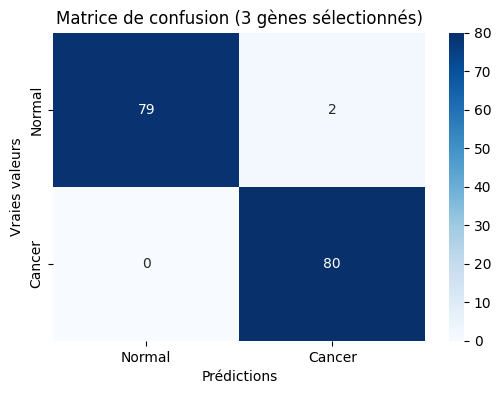

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Gènes sélectionnés
selected_genes = ['UGP2', 'DAO', 'RNF43']

# Sélectionner les données des gènes
X_train_selected = X_train[selected_genes]
X_test_selected = X_test[selected_genes]

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Initialiser et entraîner le modèle KNN
model_knn = KNeighborsClassifier(n_neighbors=5)  # Tu peux ajuster le nombre de voisins (k)
model_knn.fit(X_train_scaled, y_train)

# Prédire les valeurs
y_pred = model_knn.predict(X_test_scaled)

# Affichage du rapport de classification
print("Classification Report :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion (3 gènes sélectionnés)")
plt.show()

## SVM

Accuracy : 1.0


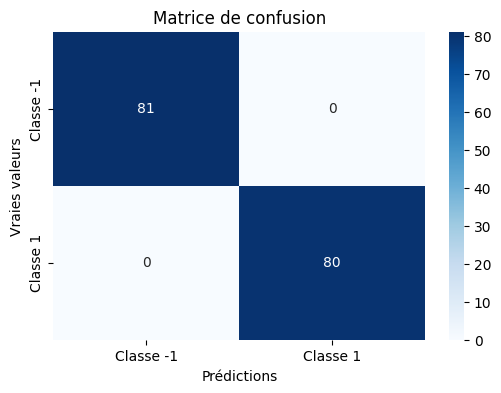

In [10]:
# Conversion des étiquettes pour SVM : 0 → -1
y_train_svm = y_train.replace(0, -1)
y_test_svm = y_test.replace(0, -1)

# ==== Implémentation du SVM linéaire simple ====
def SVM_classification(X_train, y_train, C=1.0, learning_rate=0.01, max_iter=1000):
    n_samples, n_features = X_train.shape
    w = np.zeros(n_features)
    b = 0

    for _ in range(max_iter):
        for i in range(n_samples):
            x_i = X_train[i]
            y_i = y_train[i]
            condition = y_i * (np.dot(w, x_i) + b)
            
            if condition < 1:
                w -= learning_rate * (C * (-y_i * x_i))
                b -= learning_rate * (C * (-y_i))
    
    return w, b

def SVM_prediction(X_test, w, b):
    predictions = []
    for x_i in X_test:
        prediction = np.sign(np.dot(w, x_i) + b)
        predictions.append(prediction)
    return predictions

# 6. Entraînement
w, b = SVM_classification(X_train_scaled.values, y_train_svm.values)

# 7. Prédictions
y_pred_svm = SVM_prediction(X_test_scaled.values, w, b)

# 8. Conversion des prédictions : -1 → 0
y_pred_final = pd.Series(y_pred_svm).replace(-1, 0)

# 9. Évaluation
acc = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)

# 10. Résultats
print("Accuracy :", acc)

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_svm, y_pred_svm), annot=True, fmt="d", cmap="Blues", xticklabels=['Classe -1', 'Classe 1'], yticklabels=['Classe -1', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()

In [14]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

# Conversion de y pour SVM binaire (-1 et 1)
y_train_svm = y_train.replace(0, -1)
y_test_svm = y_test.replace(0, -1)

# Entraînement du SVM avec régularisation L1
svc = LinearSVC(C=0.01, penalty='l1', dual=False, max_iter=2000)
svc.fit(X_train_scaled, y_train_svm)

# Sélection des features avec coefficients non nuls
model = SelectFromModel(svc, prefit=True)
X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)

# Récupérer les noms et importances des gènes sélectionnés
selected_mask = model.get_support()
selected_features = X_train_scaled.columns[selected_mask]
selected_importances = np.abs(svc.coef_.flatten())[selected_mask]

# Créer un DataFrame trié des gènes importants
importance_df = pd.DataFrame({
    'Gene': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)

# Afficher le tableau final
print("\nImportance des gènes sélectionnés :")
print(importance_df.to_string(index=False))



Importance des gènes sélectionnés :
   Gene  Importance
   UGP2    0.329421
 SLC7A5    0.202606
  RNF43    0.178631
NEURL1B    0.140214
    DAO    0.123532
  ADH1C    0.062797
 DHRS11    0.055168
  NCAPH    0.032789
  CLIC5    0.022484
  FOXF2    0.013366


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [24]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Trier par la valeur absolue des coefficients en ordre décroissant (déjà trié dans `importance_df`)
gene_importance_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Initialisation
accuracies = []
selected_genes = []

# Seuil de corrélation
correlation_threshold = 0.9

# Fonction d’évaluation du modèle
def evaluate_model(selected_gene_names):
    X_train_selected = X_train_scaled[selected_gene_names]
    X_test_selected = X_test_scaled[selected_gene_names]

    model = SVC()
    model.fit(X_train_selected, y_train_svm)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test_svm, y_pred)

# DataFrame pour corrélation
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train_scaled.columns)

# Sélection incrémentale avec contrôle de la corrélation
for gene in gene_importance_sorted['Gene']:
    # Vérifier si ce gène est corrélé à un des gènes déjà sélectionnés
    is_correlated = False
    for selected in selected_genes:
        corr = np.corrcoef(X_train_df[gene], X_train_df[selected])[0, 1]
        if abs(corr) > correlation_threshold:
            is_correlated = True
            break

    if not is_correlated:
        selected_genes.append(gene)
        acc = evaluate_model(selected_genes)
        accuracies.append(acc)
        print(f"Accuracy avec {len(selected_genes)} gènes : {acc:.4f}")

        # Option : arrêter si l'accuracy est constante
        if len(accuracies) > 1 and abs(accuracies[-1] - accuracies[-2]) < 1e-5:
            print("🔸 L'accuracy est stable. Arrêt de la sélection.")
            break

# Résumé final
print("\n✅ Gènes sélectionnés :")
for i, gene in enumerate(selected_genes):
    print(f"{i+1}. {gene} -> Accuracy : {accuracies[i]:.4f}")


Accuracy avec 1 gènes : 0.9689
Accuracy avec 2 gènes : 0.9752
Accuracy avec 3 gènes : 0.9814
Accuracy avec 4 gènes : 1.0000
Accuracy avec 5 gènes : 0.9938
Accuracy avec 6 gènes : 0.9938
🔸 L'accuracy est stable. Arrêt de la sélection.

✅ Gènes sélectionnés :
1. UGP2 -> Accuracy : 0.9689
2. SLC7A5 -> Accuracy : 0.9752
3. RNF43 -> Accuracy : 0.9814
4. NEURL1B -> Accuracy : 1.0000
5. DAO -> Accuracy : 0.9938
6. ADH1C -> Accuracy : 0.9938


Accuracy avec les gènes UGP2, SLC7A5, RNF43 : 0.9814


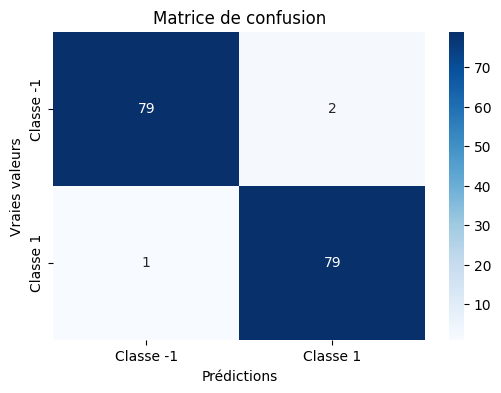

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Liste des gènes que tu veux utiliser
selected_genes = ['UGP2', 'SLC7A5', 'RNF43']

# Sélectionner uniquement ces gènes dans les données d'entraînement et de test
X_train_selected = X_train_scaled[selected_genes]
X_test_selected = X_test_scaled[selected_genes]

# Entraînement du modèle SVM
model = SVC()
model.fit(X_train_selected, y_train_svm)

# Prédictions
y_pred = model.predict(X_test_selected)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test_svm, y_pred)
print(f"Accuracy avec les gènes UGP2, SLC7A5, RNF43 : {accuracy:.4f}")

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_svm, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Classe -1', 'Classe 1'], yticklabels=['Classe -1', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()


## ARBRE DE DECISION

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Encodage de la variable cible 'tissue_status'
y = data['tissue_status'].map({'normal': 0, 'tumoral': 1})

# 2. Séparation des données en variables indépendantes (X) et dépendante (y)
# On suppose que 'data' contient toutes les colonnes, donc on sépare X et y
X = data.drop(columns=['tissue_status'])  # Enlever la colonne cible des features

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Standardisation des variables indépendantes
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)



In [91]:
import numpy as np
import pandas as pd
from collections import Counter

# L’entropie mesure le désordre ou l’impureté dans les classes.
# Si toutes les données appartiennent à une même classe, l’entropie = 0 (parfaitement pure).
# Plus l’entropie est élevée, plus les données sont mélangées (donc moins informatives).

 # on cherche à choisir l’attribut et le seuil qui rendent les groupes les plus "purs" possibles après division.
# L’entropie permet de mesurer cette "pureté
# ----------- Fonctions d'entropie et d'information -------------
def entropie(donnees):
    classes = [ligne[-1] for ligne in donnees]
    compteur = Counter(classes)
    total = len(donnees)
    return -sum((count / total) * np.log2(count / total) for count in compteur.values())


# Divise les données en deux sous-ensembles selon un seuil sur un attribut (feature).
def diviser(donnees, index_attribut, seuil):
    gauche = [ligne for ligne in donnees if ligne[index_attribut] <= seuil]
    droite = [ligne for ligne in donnees if ligne[index_attribut] > seuil]
    return gauche, droite


# Le gain d'information est la différence d’entropie entre le groupe initial et les groupes obtenus après division.
# Il sert à choisir le meilleur critère de division.
def gain_information(donnees, index_attribut, seuil):
    gauche, droite = diviser(donnees, index_attribut, seuil)
    if not gauche or not droite:
        return 0
    total = len(donnees)
    return entropie(donnees) - (len(gauche)/total)*entropie(gauche) - (len(droite)/total)*entropie(droite)


# Parcourt chaque attribut (colonne) et teste plusieurs seuils possibles.
# Retourne l'attribut et le seuil qui maximisent le gain d'information.
# ----------- Recherche du meilleur critère -------------
def meilleur_critere(donnees):
    n_features = len(donnees[0]) - 1
    meilleur_gain = 0
    meilleur_index, meilleur_seuil = None, None

    for index in range(n_features):
        valeurs = sorted(set(ligne[index] for ligne in donnees))
        seuils = [(valeurs[i] + valeurs[i+1]) / 2 for i in range(len(valeurs)-1)]
        for seuil in seuils:
            gain = gain_information(donnees, index, seuil)
            if gain > meilleur_gain:
                meilleur_gain = gain
                meilleur_index, meilleur_seuil = index, seuil

    return meilleur_index, meilleur_seuil

# ----------- Critère d'arrêt -------------
def critere_arret(donnees):
    classes = [ligne[-1] for ligne in donnees]
    return len(set(classes)) == 1

# ----------- Classe majoritaire -------------
def classe_majoritaire(donnees):
    classes = [ligne[-1] for ligne in donnees]
    return Counter(classes).most_common(1)[0][0]

# ----------- Construction de l'arbre -------------
def construire_arbre(donnees):
    if critere_arret(donnees):
        return {'feuille': classe_majoritaire(donnees)}

    index, seuil = meilleur_critere(donnees)
    if index is None:
        return {'feuille': classe_majoritaire(donnees)}

    gauche, droite = diviser(donnees, index, seuil)
    if not gauche or not droite:
        return {'feuille': classe_majoritaire(donnees)}

    return {
        'index': index,
        'seuil': seuil,
        'gauche': construire_arbre(gauche),
        'droite': construire_arbre(droite)
    }

# ---------- Prédiction ----------
def predire(arbre, ligne):
    if 'feuille' in arbre:
        return arbre['feuille']
    if ligne[arbre['index']] <= arbre['seuil']:
        return predire(arbre['gauche'], ligne)
    else:
        return predire(arbre['droite'], ligne)


Rapport de classification :
              precision    recall  f1-score   support

      normal       1.00      0.96      0.98        81
     tumoral       0.96      1.00      0.98        80

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



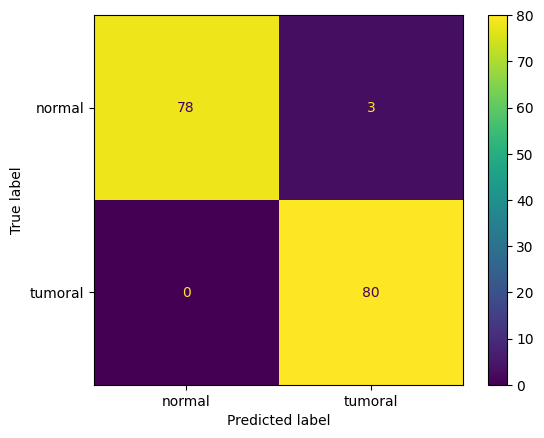

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Fusion X_train_scaled et y_train pour former les données d'entraînement pour l’arbre
donnees_train = X_train_scaled.copy()
donnees_train['label'] = y_train.values

# Arbre construit à partir de la liste de listes
arbre = construire_arbre(donnees_train.values.tolist())

# Prédictions
y_pred = [int(predire(arbre, ligne)) for ligne in X_test_scaled.values.tolist()]

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'tumoral'])
disp.plot()

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=['normal', 'tumoral']))


Pour identifier les gènes les plus importants dans ton modèle de classification, tu peux utiliser la technique de l'importance des caractéristiques. La plupart des modèles de classification, comme les arbres de décision, les forêts aléatoires et les modèles de gradient boosting, offrent une méthode intégrée pour évaluer l'importance des caractéristiques.

In [93]:
import numpy as np

# Calcul de l'impureté de Gini
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    return 1 - np.sum(probs**2)

# Calcul de la réduction de Gini pour une caractéristique
def gini_reduction(X, y, feature_index):
    # Trier les données en fonction de la caractéristique
    sorted_indices = X[:, feature_index].argsort()
    sorted_X = X[sorted_indices]
    sorted_y = y[sorted_indices]
    
    # Initialisation des valeurs de Gini avant la division
    impurity_before = gini_impurity(sorted_y)
    
    total_size = len(y)
    left_size = 0
    right_size = total_size
    left_labels = np.zeros_like(y)
    right_labels = np.copy(sorted_y)
    
    # Initialiser l'importance
    importance = 0
    
    # Calcul de la réduction d'impureté pour chaque coupure possible
    for i in range(1, total_size):
        left_size += 1
        right_size -= 1
        left_labels[sorted_indices[:i]] = sorted_y[:i]
        right_labels[sorted_indices[i:]] = sorted_y[i:]
        
        impurity_left = gini_impurity(left_labels[:i])
        impurity_right = gini_impurity(right_labels[i:])
        
        # Calcul de la réduction d'impureté
        weighted_impurity = (left_size / total_size) * impurity_left + (right_size / total_size) * impurity_right
        reduction = impurity_before - weighted_impurity
        importance += reduction
        
    return importance

# Accumuler l'importance des caractéristiques
def compute_feature_importances(X, y, num_features):
    importances = np.zeros(num_features)
    
    for feature_index in range(num_features):
        importances[feature_index] = gini_reduction(X, y, feature_index)
    
    return importances

# Exemple d'utilisation avec des données X (features) et y (labels)
X = X_train_scaled.values  # Supposons que X_train_scaled est ton ensemble de données d'entraînement
y = y_train.values  # Supposons que y_train est ton vecteur cible

# Calculer l'importance des caractéristiques
importances = compute_feature_importances(X, y, X.shape[1])

# Afficher les caractéristiques les plus importantes
importance_df = pd.DataFrame({
    'caractéristique': X_train_scaled.columns,
    'importance': importances
})

# Trier par importance décroissante
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Afficher les 10 caractéristiques les plus importantes
print(importance_df.head(10))



   caractéristique  importance
44           RNF43   67.910478
3           SLC7A5   67.730965
13           NCAPH   60.561708
27           DDIT4   55.324689
51           BSPRY   46.179702
42           RPP25   43.489781
45          EPS8L1   42.069956
55            PLLP   36.061455
56             GAL   35.432169
43          SEMA4C   34.653790


In [97]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialisation des variables
accuracies = []
selected_genes = []

# Seuil de corrélation
correlation_threshold = 0.9

# Fonction d’évaluation du modèle
def evaluate_model(selected_gene_names):
    X_train_selected = X_train[selected_gene_names]
    X_test_selected = X_test[selected_gene_names]

    # Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)

    model = DecisionTreeClassifier(random_state=42)  
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    return accuracy_score(y_test, y_pred)

# DataFrame pour corrélation
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

# Sélection incrémentale avec contrôle de la corrélation
for _, row in gene_importance_sorted.iterrows():
    gene = row['caractéristique']  # Remplacer 'caractéristique' par 'Gene' en fonction de ton DataFrame
    
    # Vérifier si ce gène est corrélé à un des gènes déjà sélectionnés
    is_correlated = False
    for selected in selected_genes:
        corr = np.corrcoef(X_train_df[gene], X_train_df[selected])[0, 1]
        if abs(corr) > correlation_threshold:
            is_correlated = True
            break

    if not is_correlated:
        selected_genes.append(gene)
        acc = evaluate_model(selected_genes)
        accuracies.append(acc)
        print(f"Accuracy avec {len(selected_genes)} gènes : {acc:.4f}")

        # Option : arrêter si l'accuracy est stable
        if len(accuracies) > 1 and abs(accuracies[-1] - accuracies[-2]) < 1e-5:
            print("🔸 L'accuracy est stable. Arrêt de la sélection.")
            break

# Résumé final
print("\n✅ Gènes sélectionnés :")
for i, gene in enumerate(selected_genes):
    print(f"{i+1}. {gene} -> Accuracy : {accuracies[i]:.4f}")


Accuracy avec 1 gènes : 0.8820
Accuracy avec 2 gènes : 0.9441
Accuracy avec 3 gènes : 0.9006
Accuracy avec 4 gènes : 0.9317
Accuracy avec 5 gènes : 0.9379
Accuracy avec 6 gènes : 0.9317
Accuracy avec 7 gènes : 0.9441
Accuracy avec 8 gènes : 0.9255
Accuracy avec 9 gènes : 0.9379
Accuracy avec 10 gènes : 0.9317
Accuracy avec 11 gènes : 0.9379
Accuracy avec 12 gènes : 0.9255
Accuracy avec 13 gènes : 0.9441
Accuracy avec 14 gènes : 0.9379
Accuracy avec 15 gènes : 0.9379
🔸 L'accuracy est stable. Arrêt de la sélection.

✅ Gènes sélectionnés :
1. RNF43 -> Accuracy : 0.8820
2. SLC7A5 -> Accuracy : 0.9441
3. NCAPH -> Accuracy : 0.9006
4. DDIT4 -> Accuracy : 0.9317
5. BSPRY -> Accuracy : 0.9379
6. RPP25 -> Accuracy : 0.9317
7. EPS8L1 -> Accuracy : 0.9441
8. PLLP -> Accuracy : 0.9255
9. GAL -> Accuracy : 0.9379
10. SEMA4C -> Accuracy : 0.9317
11. MXRA8 -> Accuracy : 0.9379
12. TRAPPC14 -> Accuracy : 0.9255
13. OTULINL -> Accuracy : 0.9441
14. NDFIP2 -> Accuracy : 0.9379
15. STEAP3 -> Accuracy : 0

🎯 Accuracy avec RNF43, PLLP, GAL : 0.8915

📝 Rapport de classification :
              precision    recall  f1-score   support

      normal       0.88      0.91      0.89        64
     tumoral       0.90      0.88      0.89        65

    accuracy                           0.89       129
   macro avg       0.89      0.89      0.89       129
weighted avg       0.89      0.89      0.89       129



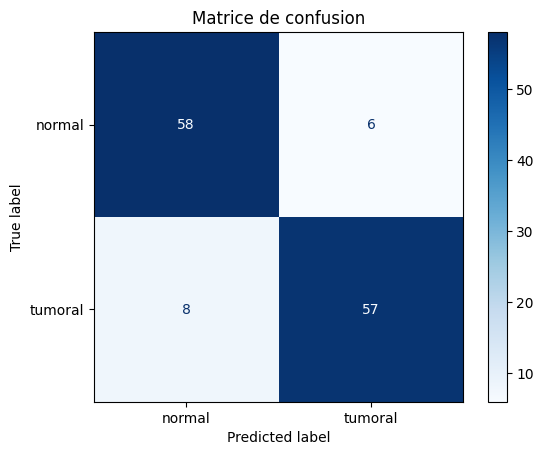

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Sélection des gènes
selected_genes = ['RNF43', 'PLLP', 'GAL']

# 2. Sélection des données
X_train_selected = X_train[selected_genes]
X_test_selected = X_test[selected_genes]

# 3. Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# 4. Entraînement du modèle
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 5. Prédictions
y_pred = model.predict(X_test_scaled)

# 6. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy avec RNF43, PLLP, GAL : {accuracy:.4f}")

# 7. Rapport de classification
print("\n📝 Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=['normal', 'tumoral']))

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'tumoral'])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()


## Foret aleatoire

In [7]:
import random
from collections import Counter
from sklearn.metrics import accuracy_score

# ==== STRUCTURE DE NOEUD ====
class Noeud:
    def __init__(self, critere=None, valeur=None, enfants=None, feuille=False, classe=None):
        self.critere = critere
        self.valeur = valeur
        self.enfants = enfants if enfants is not None else {}
        self.feuille = feuille
        self.classe = classe

# ==== OUTILS ====
def classe_majoritaire(ensemble):
    """Renvoie la classe majoritaire dans un ensemble d'exemples"""
    classes = [exemple[-1] for exemple in ensemble]
    return Counter(classes).most_common(1)[0][0]

def critere_d_arret(ensemble):
    """Critère d'arrêt pour la construction de l'arbre : si toutes les instances ont la même classe ou si l'ensemble est vide"""
    classes = [exemple[-1] for exemple in ensemble]
    return len(set(classes)) == 1 or len(ensemble) == 0

def calculer_gini(ensemble, critere):
    """Calcul de l'indice de Gini pour un critère donné"""
    partitions = {}
    for exemple in ensemble:
        valeur = exemple[critere]
        if valeur not in partitions:
            partitions[valeur] = []
        partitions[valeur].append(exemple)
    
    total = len(ensemble)
    gini = 0.0
    for sous_ensemble in partitions.values():
        if len(sous_ensemble) == 0:
            continue
        proportion = len(sous_ensemble) / total
        classes = [exemple[-1] for exemple in sous_ensemble]
        score = sum((classes.count(c) / len(classes))**2 for c in set(classes))
        gini += proportion * (1 - score)
    return gini

def selectionner_meilleur_critere(ensemble, caracteristiques):
    """Choisir le critère avec le plus petit indice de Gini"""
    scores = {c: calculer_gini(ensemble, c) for c in caracteristiques}
    return min(scores, key=scores.get)

def diviser(ensemble, critere):
    """Diviser l'ensemble selon un critère donné"""
    partitions = {}
    for exemple in ensemble:
        valeur = exemple[critere]
        if valeur not in partitions:
            partitions[valeur] = []
        partitions[valeur].append(exemple)
    return partitions

# ==== CONSTRUCTION D'UN ARBRE ====
def ConstruireArbre(ensembleDonnees, nombreCaracteristiques):
    """Construire un arbre de décision"""
    if critere_d_arret(ensembleDonnees):
        return Noeud(feuille=True, classe=classe_majoritaire(ensembleDonnees))

    toutes_caracteristiques = list(range(len(ensembleDonnees[0]) - 1))
    caracteristiques_choisies = random.sample(toutes_caracteristiques, min(nombreCaracteristiques, len(toutes_caracteristiques)))

    meilleur_critere = selectionner_meilleur_critere(ensembleDonnees, caracteristiques_choisies)
    noeud = Noeud(critere=meilleur_critere)

    partitions = diviser(ensembleDonnees, meilleur_critere)

    for valeur, sous_ensemble in partitions.items():
        if not sous_ensemble:
            enfant = Noeud(feuille=True, classe=classe_majoritaire(ensembleDonnees))
        else:
            enfant = ConstruireArbre(sous_ensemble, nombreCaracteristiques)
        noeud.enfants[valeur] = enfant

    return noeud

# ==== CONSTRUCTION DE LA FORÊT ALÉATOIRE ====
def construire_foret(ensembleDonnees, nombreArbres, nombreCaracteristiques):
    """Construire une forêt aléatoire"""
    foret = []
    for _ in range(nombreArbres):
        # Echantillonnage bootstrap (tirage avec remplacement)
        ensemble_echantillon = [random.choice(ensembleDonnees) for _ in range(len(ensembleDonnees))]
        arbre = ConstruireArbre(ensemble_echantillon, nombreCaracteristiques)
        foret.append(arbre)
    return foret

# ==== PRÉDICTION AVEC LA FORÊT ====
def predire_foret(foret, exemple):
    """Faire une prédiction à l'aide de la forêt : vote majoritaire entre les arbres"""
    predictions = [predire(arbre, exemple) for arbre in foret]
    return Counter(predictions).most_common(1)[0][0]

# ==== ÉVALUATION ====
def evaluer_modele(foret, X_test, y_test):
    """Évaluer le modèle de la forêt aléatoire"""
    predictions = [predire_foret(foret, x) for x in X_test]
    y_test_filtree = [y for y, p in zip(y_test, predictions) if p is not None]
    predictions_filtrees = [p for p in predictions if p is not None]
    
    if len(predictions_filtrees) == 0:
        print("Aucune prédiction possible.")
        return 0.0

    return accuracy_score(y_test_filtree, predictions_filtrees)


In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Prédictions avec la forêt aléatoire
predictions = [predire_foret(foret, x) for x in X_test_list]

# Nettoyage des valeurs None
pred_clean = [p for p in predictions if p is not None]
y_clean = [y for p, y in zip(predictions, y_test) if p is not None]

# Évaluation
print("Accuracy :", accuracy_score(y_clean, pred_clean))
print(classification_report(y_clean, pred_clean))


Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [26]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Crée un modèle RandomForest avec les paramètres par défaut
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle avec les données d'entraînement
model.fit(X_train, y_train)

# Extraire l'importance des caractéristiques
importances = model.feature_importances_

# Créer un DataFrame pour afficher les importances triées par ordre décroissant
importance_df = pd.DataFrame({
    'Caractéristique': X_train.columns,
    'Importance': importances
})

# Trier par ordre décroissant d'importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(importance_df)


   Caractéristique  Importance
2             UGP2    0.171861
5              DAO    0.145784
3           SLC7A5    0.103186
44           RNF43    0.091354
0            ADH1C    0.067812
26         NEURL1B    0.066113
1           DHRS11    0.045813
8            FOXF2    0.044275
25            SIAE    0.024829
47           PAQR5    0.018763
11           FABP1    0.018244
13           NCAPH    0.018165
9           TENT5C    0.017540
54           CLIC5    0.017287
41          RHBDL2    0.013635
4             CTSS    0.013369
33       ANKRD40CL    0.012447
32           SAMD9    0.011849
52           CDHR2    0.009915
31            CPVL    0.009534
15        PLA2G12B    0.008561
6           NIBAN1    0.007319
51           BSPRY    0.005628
14            TPM1    0.004114
28           TRPM4    0.004042
45          EPS8L1    0.004031
17        IGLV8-61    0.003731
27           DDIT4    0.003189
55            PLLP    0.002946
37            P3H2    0.002925
12         RPSAP19    0.002800
29      

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialisation des variables
accuracies = []
selected_genes = []

# Seuil de corrélation
correlation_threshold = 0.9

# Fonction d’évaluation du modèle
def evaluate_model(selected_gene_names):
    X_train_selected = X_train[selected_gene_names]
    X_test_selected = X_test[selected_gene_names]

   

    model = RandomForestClassifier(random_state=42)  # Utilisation de la forêt d'arbres
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# DataFrame pour corrélation
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

# Sélection incrémentale avec contrôle de la corrélation
for _, row in importance_df.iterrows():
    gene = row['Caractéristique'] 
    
    # Vérifier si ce gène est corrélé à un des gènes déjà sélectionnés
    is_correlated = False
    for selected in selected_genes:
        corr = np.corrcoef(X_train_df[gene], X_train_df[selected])[0, 1]
        if abs(corr) > correlation_threshold:
            is_correlated = True
            break

    if not is_correlated:
        selected_genes.append(gene)
        acc = evaluate_model(selected_genes)
        accuracies.append(acc)
        print(f"Accuracy avec {len(selected_genes)} gènes : {acc:.4f}")

        # Vérifier si l'accuracy s'est répétée 3 fois
        if len(accuracies) > 2 and accuracies[-1] == accuracies[-2] == accuracies[-3]:
            break

# Résumé final
print("\n✅ Gènes sélectionnés :")
for i, gene in enumerate(selected_genes):
    print(f"{i+1}. {gene} -> Accuracy : {accuracies[i]:.4f}")


Accuracy avec 1 gènes : 0.9752
Accuracy avec 2 gènes : 0.9752
Accuracy avec 3 gènes : 0.9876
Accuracy avec 4 gènes : 0.9876
Accuracy avec 5 gènes : 0.9876

✅ Gènes sélectionnés :
1. UGP2 -> Accuracy : 0.9752
2. DAO -> Accuracy : 0.9752
3. SLC7A5 -> Accuracy : 0.9876
4. RNF43 -> Accuracy : 0.9876
5. ADH1C -> Accuracy : 0.9876


Accuracy du modèle réentrainé avec les gènes sélectionnés : 0.9876


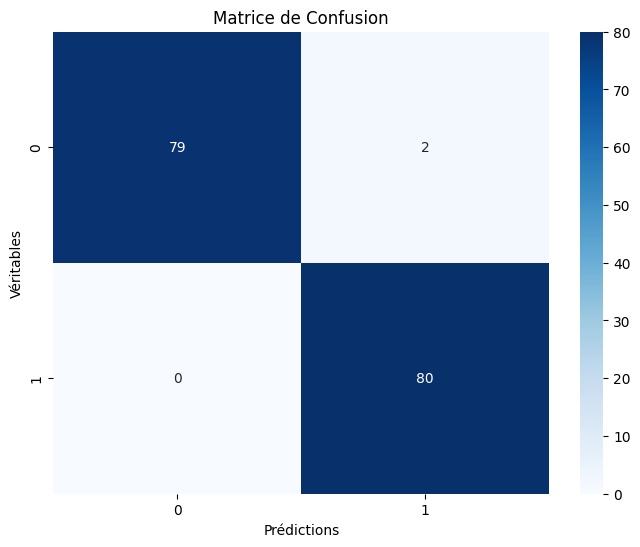

In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des gènes sélectionnés après la sélection incrémentale
selected_genes = ['UGP2', 'DAO', 'SLC7A5']

# Fonction d’évaluation du modèle
def evaluate_model(selected_gene_names):
    X_train_selected = X_train[selected_gene_names]
    X_test_selected = X_test[selected_gene_names]


    model = RandomForestClassifier(random_state=42)  # Utilisation de la forêt d'arbres
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    return y_pred


y_pred = evaluate_model(selected_genes)
conf_matrix = confusion_matrix(y_test, y_pred)

# Réentraîner le modèle avec les gènes sélectionnés
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle réentrainé avec les gènes sélectionnés : {accuracy:.4f}")

# Affichage de la matrice de confusion avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.title('Matrice de Confusion')
plt.show()